data: https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/L2GSK6

In [144]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('https://raw.githubusercontent.com/datatrooper/instatrooper/master/styles/bluetrooper.mplstyle')
dp = [
    "#e6d3ad",
    "#967B4F",
    "#46493D",
    "#839DA5",
    "#9FADAD",
    "#2B4144",
    "#986E37"
]

In [103]:
df = pd.read_csv("../../../data/blm/policedeaths_during.csv").drop("Unnamed: 0", axis=1)
df_col = pd.read_csv("../../../data/blm/disc_col.csv", sep=";")

In [37]:
df

,stateFIPS,Area.Name2,state,X,firstname,lastname,season,year,name.pd,vage,...,Symptoms.of.mental.illness.,Unique.identifier.submitted.by,State.Data.Status,Date.Description,X12779,fe.uid,merge2,city.new,Area.Name,Id2
0,1,Bay Minette,AL,14,Gilbert,Fleury,1,2015,Gilbert Fleury,54,...,Yes,kbp/PThompson,Complete,3/11/2015: Neighbors called police about a man...,NaN,10215,Gilbert Fleury AL 2015-03-11,Bay Minette,Bay Minette,104660
1,1,Bessemer,AL,25,Zamiel,Crawford,2,2015,Zamiel Kivon Crawford,21,...,Unknown,CRDeCeros,Complete,6/19/2015: Zamiel Crawford died after he crash...,NaN,10589,Zamiel Kivon Crawford AL 2015-06-19,Bessemer,Bessemer,105980
2,1,Birmingham,AL,20,Stanley,Grant,1,2015,Stanley Lamar Grant,38,...,No,PThompson,Complete,2/20/2015: Police were trying to serve a warra...,NaN,10138,Stanley Lamar Grant AL 2015-02-20,Birmingham,Birmingham,107000
3,1,Birmingham,AL,11,Douglas,Harris,1,2015,Douglas Harris,77,...,Yes,kbp/PThompson,Complete,2/20/2015: Police conducting a February 20 wel...,NaN,10141,Douglas Harris AL 2015-02-20,Birmingham,Birmingham,107000
4,1,Blountsville,AL,8,Caleb,Ryan,4,2014,Caleb Joseph Ryan,28,...,Drug or alcohol use,Feisty,Complete,11/3/2014: A deputy responded to a domestic ca...,NaN,9769,Caleb Joseph Ryan AL 2014-11-03,Blountsville,Blountsville,107456
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1092,8,Strasburg,CO,254,Damien,Ramirez,2,2015,Damien James Ramirez,27,...,No,Guardian/Dalila,Incomplete,6/6/2015: Ramirez had a record as a sex offend...,NaN,10548,Damien James Ramirez CO 2015-06-06,Strasburg,Strasburg,874375
1093,8,Trinidad,CO,275,Todd,Dye,2,2015,Todd Jamal Dye,20,...,No,kbp/Irish,Incomplete,4/24/2015: An officer came in contact with Dye...,NaN,10385,Todd Jamal Dye CO 2015-04-24,Trinidad,Trinidad,878610
1094,9,Branford Center,CT,276,David,Werblow,1,2015,David Werblow,41,...,Yes,New JoshN,Complete,3/15/2015: An unarmed David Werblow died after...,NaN,10226,David Werblow CT 2015-03-15,Branford Center,Branford Center,907345
1095,9,Hartford,CT,278,Matthew,Russo,3,2015,Matthew Russo,26,...,Unknown,Guardian/,Complete,8/7/2015: Russo grew combative with police and...,NaN,10796,Matthew Russo CT 2015-08-07,Hartford,Hartford,937000


In [38]:
df.columns

Index(['stateFIPS', 'Area.Name2', 'state', 'X', 'firstname', 'lastname',
       'season', 'year', 'name.pd', 'vage', 'vgender', 'vrace', 'urlimage',
       'dateinjury', 'locinjury', 'city.pd', 'zip', 'county', 'agency',
       'causeofdeath', 'circ', 'offdisp', 'criminalcharges', 'linknews',
       'mentallyill', 'unarmed', 'date.pd', 'pd.uid', 'Timestamp', 'name.fe',
       'Subject.s.age', 'Subject.s.gender', 'Subject.s.race',
       'URL.of.image.of.deceased', 'date.fe', 'Location.of.injury..address.',
       'city.fe', 'Location.of.death..zip.code.', 'Location.of.death..county.',
       'Agency.responsible.for.death', 'Cause.of.death',
       'A.brief.description.of.the.circumstances.surrounding.the.death',
       'Official.disposition.of.death..justified.or.other.',
       'Link.to.news.article.or.photo.of.official.document',
       'Symptoms.of.mental.illness.', 'Unique.identifier.submitted.by',
       'State.Data.Status', 'Date.Description', 'X12779', 'fe.uid', 'merge2',
      

In [57]:
df_black = df[df["vrace"] == "Black"]
df_black_unarmed = df_black[df_black["unarmed"] == "Unarmed"]
df_black_unarmed_states = df_black_unarmed.groupby("state").size().to_frame("cuenta").sort_values("cuenta", ascending=False).reset_index()
df_black_unarmed_states

,state,cuenta
0,TX,12
1,FL,11
2,GA,9
3,CA,7
4,MD,6
5,NY,5
6,OK,4
7,OH,4
8,NJ,4
9,TN,3


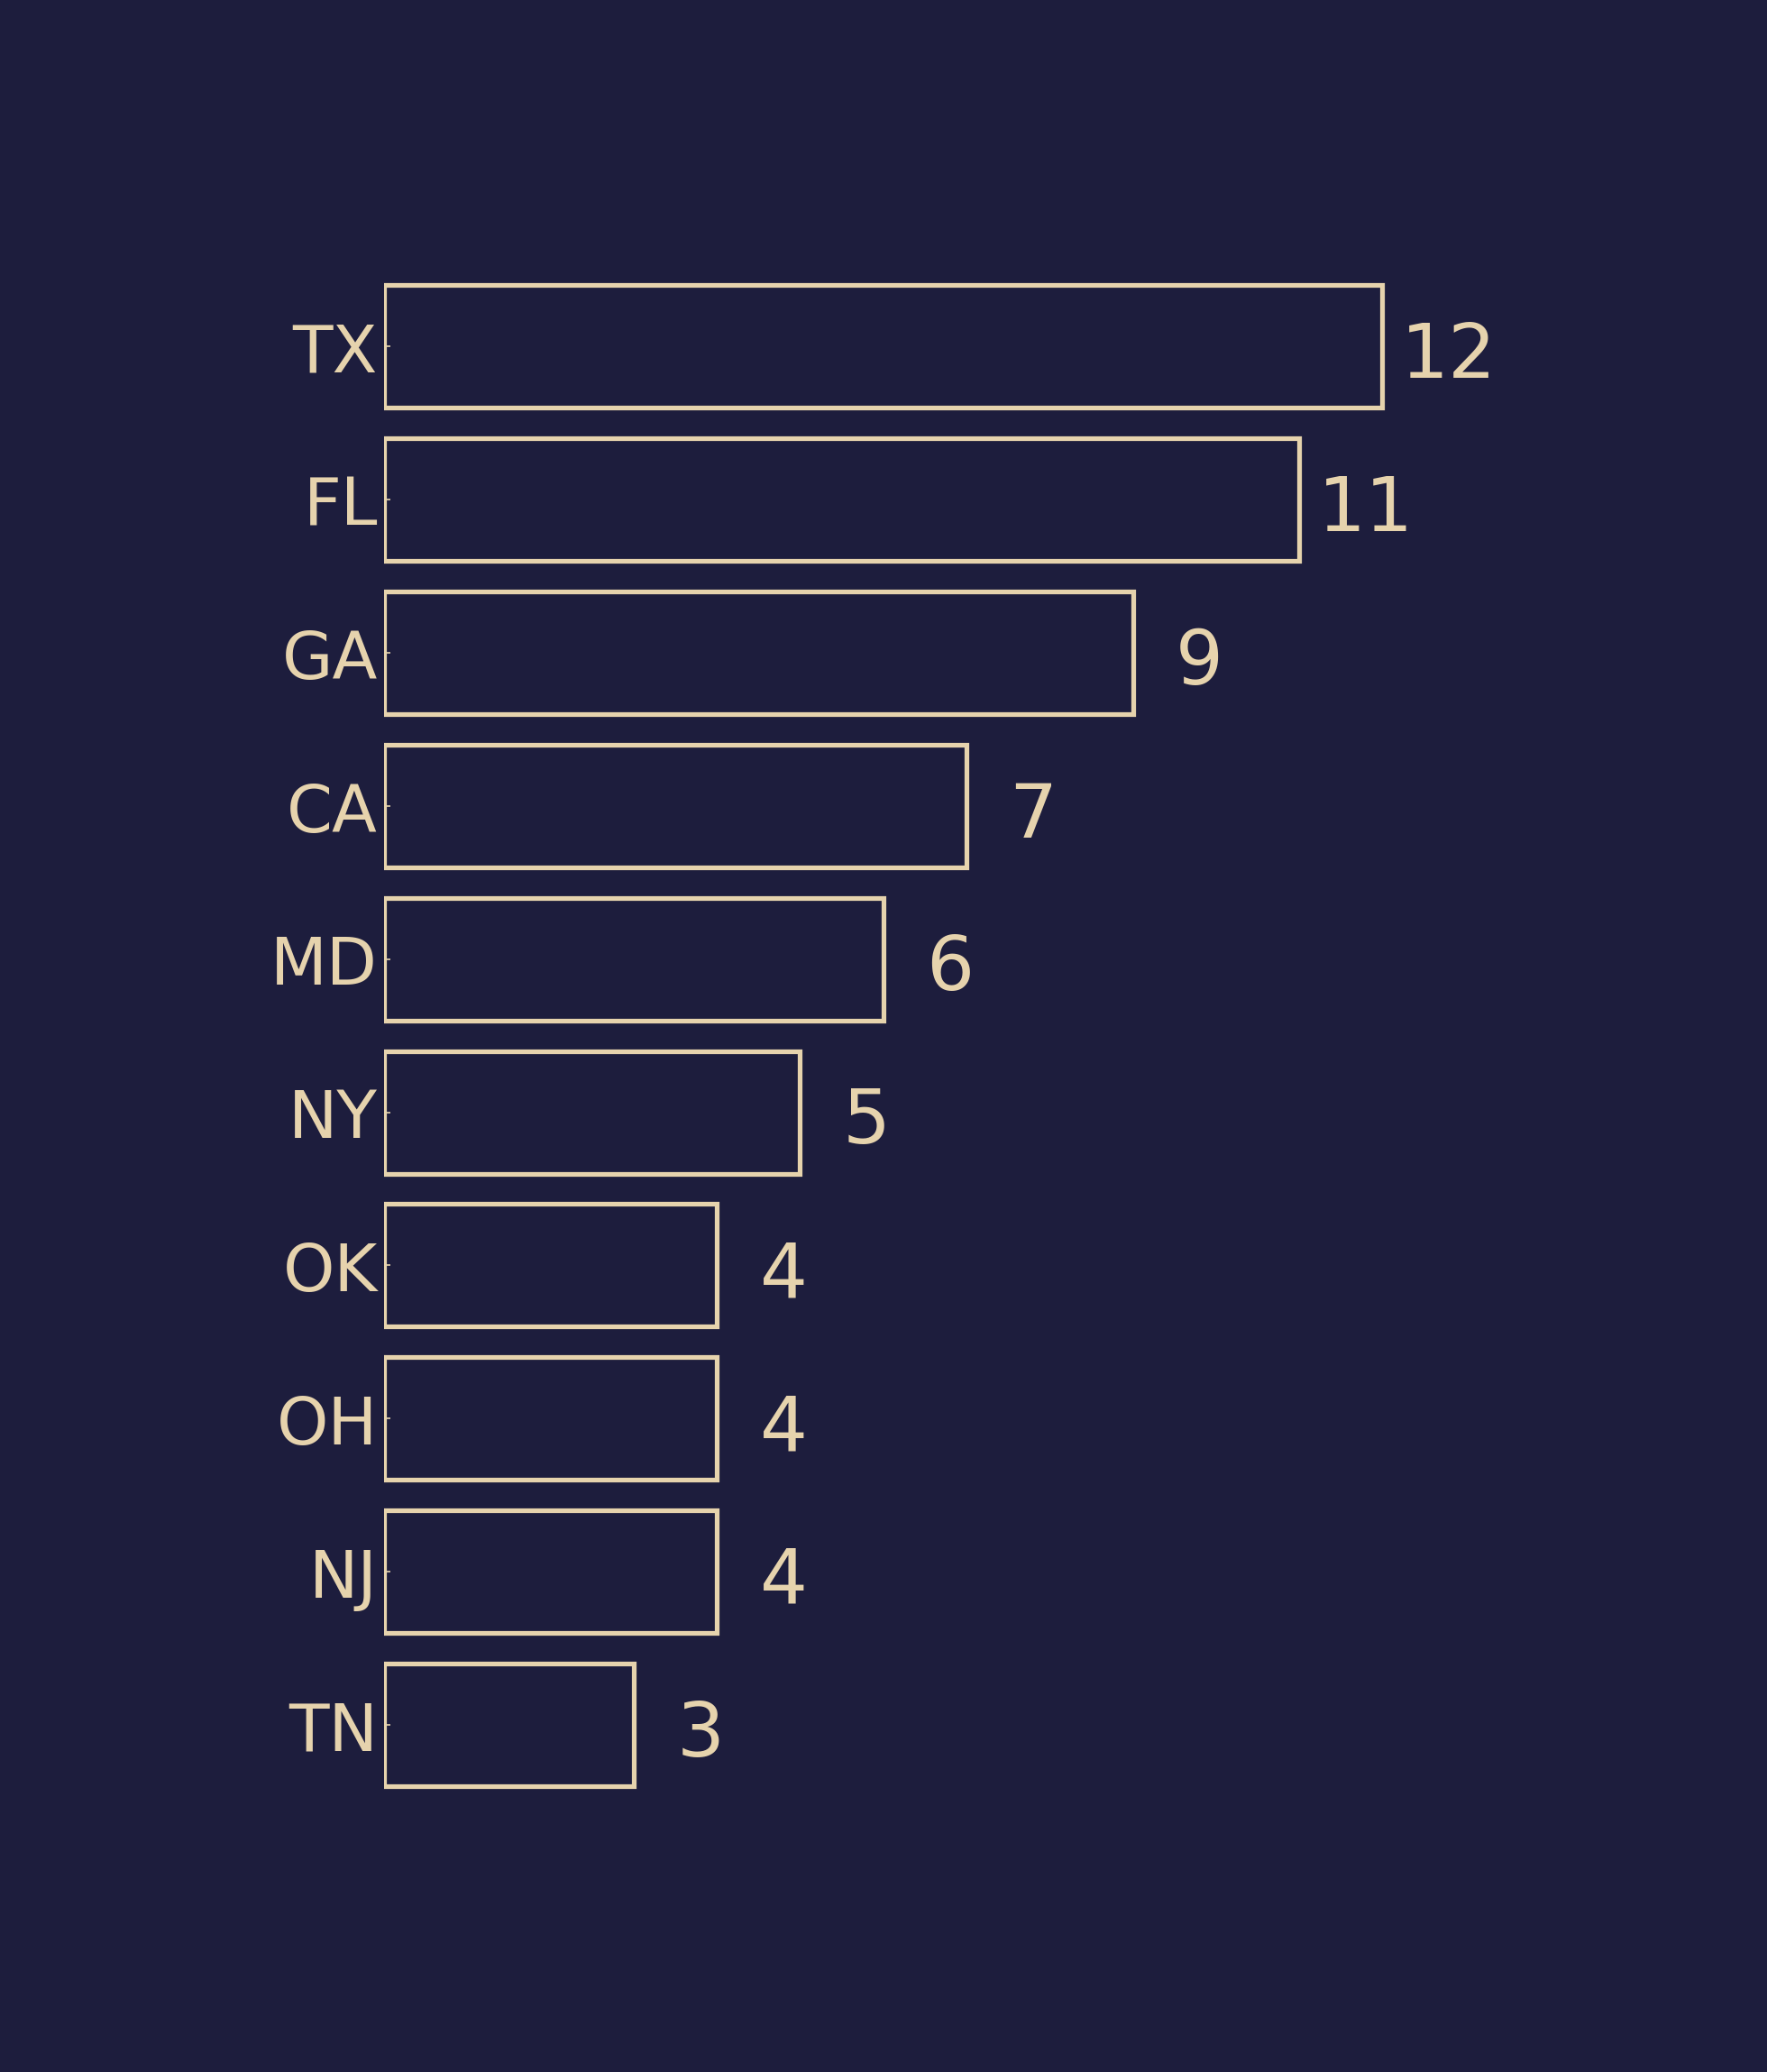

In [100]:
fig = plt.figure(figsize=(10,15))
ax = sns.barplot(x="cuenta", y="state", data=df_black_unarmed_states.head(10), orient="h",color="white",linewidth=2.5, facecolor=(1, 1, 1, 0),edgecolor="#e6d3ad")
plt.grid(False)

ax.set_xlabel("", fontsize=20)
plt.xticks([])
plt.box(False)
ax.set_ylabel("", fontsize=20)



# jugar con estos valores
vertical_offset = 0.2
horizontal_offset = 0.8

ax.tick_params(axis='both', which='major', labelsize=35,colors="#e6d3ad")
for index, row in df_black_unarmed_states.head(10).iterrows():
    ax.text(row["cuenta"] + horizontal_offset,index+vertical_offset, # posicion
            row["cuenta"], # texto
            color='#e6d3ad', 
            ha="center", 
            size=40)
    
plt.savefig(f'spell7.png',bbox_inches='tight', transparent="True", pad_inches = 0)
plt.show()

1 si, 2 no

In [106]:
df_col["dis11n"].value_counts()

.c    844
2     776
1      43
Name: dis11n, dtype: int64

In [138]:
discr = df_col[df_col["dis11n"]=="1"]
num_dicsr = discr["etid"].value_counts().to_frame().reset_index().rename(columns={"index":"raza", "etid":"discriminados"})
num_dicsr["total"] = num_dicsr["raza"].apply(lambda x: df_col[df_col["etid"]==x].shape[0])
num_dicsr["perc"] = num_dicsr["discriminados"]*100 / num_dicsr["total"]
nombres = ["Negra", "Mestiza", "Indígena", "Blanca", "Mulata", "Otra"]
num_dicsr["nombre"] = nombres
num_dicsr = num_dicsr.sort_values("perc", ascending=False).reset_index(drop=True)
num_dicsr

,raza,discriminados,total,perc,nombre
0,4,15,130,11.538462,Negra
1,3,7,92,7.608696,Indígena
2,5,4,62,6.451613,Mulata
3,7,1,56,1.785714,Otra
4,2,12,753,1.593625,Mestiza
5,1,4,493,0.811359,Blanca


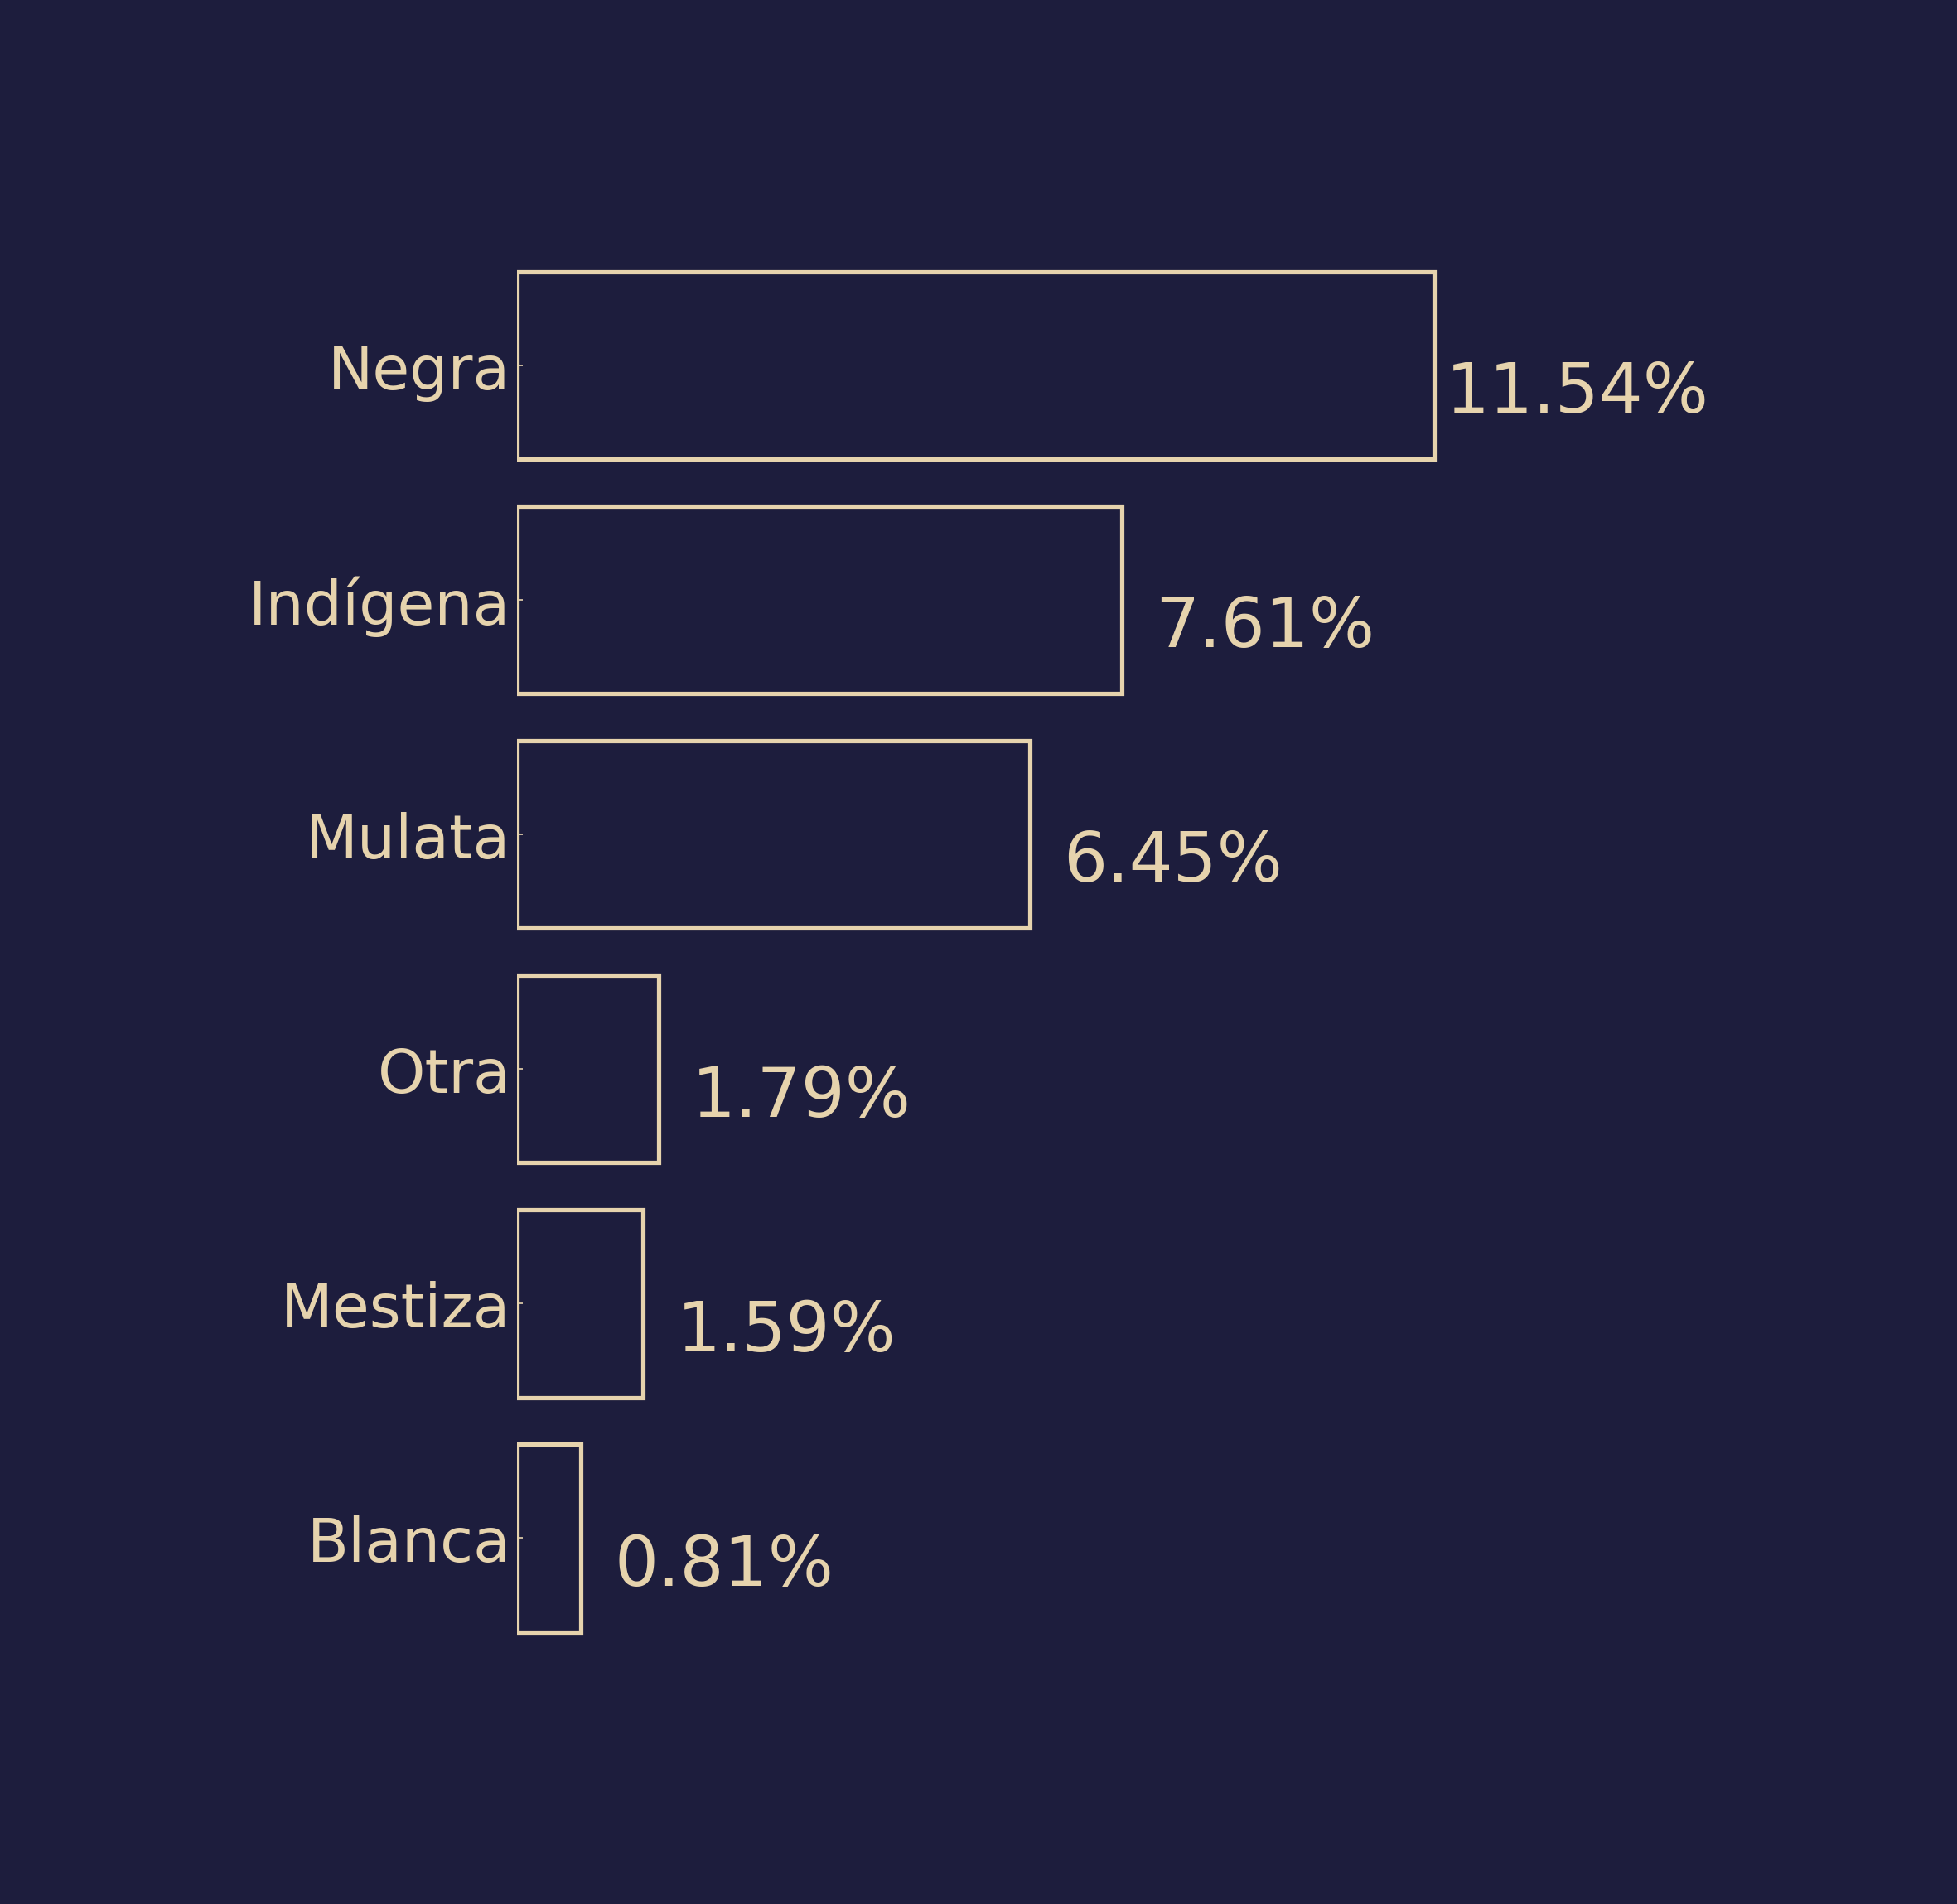

In [150]:
fig = plt.figure(figsize=(10,15))
ax = sns.barplot(x="perc", y="nombre", data=num_dicsr, orient="h",color="white",linewidth=2.5, facecolor=(1, 1, 1, 0),edgecolor="#e6d3ad")
plt.grid(False)

ax.set_xlabel("", fontsize=20)
plt.xticks([])
plt.box(False)
ax.set_ylabel("", fontsize=20)



# jugar con estos valores
vertical_offset = 0.2
horizontal_offset = 1.8

ax.tick_params(axis='both', which='major', labelsize=35,colors="#e6d3ad")
for index, row in num_dicsr.iterrows():
    ax.text(row["perc"] + horizontal_offset,index+vertical_offset, # posicion
            str(np.round(row["perc"],2)) + "%", # texto
            color='#e6d3ad', 
            ha="center", 
            size=40)
    
plt.savefig(f'col.png',bbox_inches='tight', transparent="True", pad_inches = 0)
plt.show()